# Evaluating the relation between auto violet and labeled violet

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("test_labels.csv", sep =";", header=0, index_col=0)

# Decision based on a threshold?

If there was a perfect correlation we would assume a table where [True,True] and [False,False] have a high cooccurence.

In [136]:
pd.crosstab(df['auto_violet']>0,df['is_violet']==1.0)

is_violet,False,True
auto_violet,,
False,1797,33
True,188,42


=> There are 33 False negatives (auto_violet did not detect that piece was violet) as compared to 42 True positives


=> There are 1797 True negatives as compared to 188 False negatives

In [7]:
pd.crosstab(df['auto_violet']>5,df['is_violet']==1.0)

is_violet,False,True
auto_violet,,
False,1985,69
True,0,6


Changing the threshold does not look like it's changing the correlation a lot but changes True positive/ False negatives.

It looks like one pixel in violet range is a good threshold for not missing violet pieces.


=> Simple way to introduce a bias (Avoid: detected violet == True for non violet pieces? yes or no?)

## More general relation


We use pd.cut to make auto_violet discrete. It shall have few values. We summarize in bins.

Here's an example how it works:

In [10]:
pd.cut([1,20,30],3,labels=[1,2,3])

[1, 2, 3]
Categories (3, int64): [1 < 2 < 3]

Now for the actual data....


## Histogram

In [21]:
import numpy as np
import matplotlib.pyplot as plt
arr = np.array(df['auto_violet'])
arr = arr[~np.isnan(arr)]

In [26]:
arr = arr[arr>1]

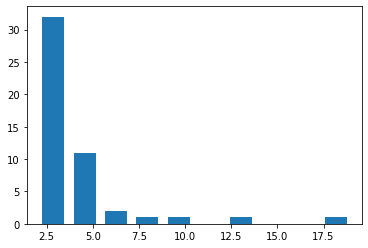

In [27]:
hist, bins = np.histogram(arr)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Values that are far beyond zero are sparse. Here we have 17.5 as a maximum.

Twenty categories shall be more then enough.

## Crosstable for ordinal categories

In [134]:
categorized = pd.cut(np.array(df['auto_violet']), 20)

In [135]:
pd.crosstab(categorized,df['is_violet']==1.0)

is_violet,False,True
row_0,,
"(-0.019, 0.95]",1794,33
"(0.95, 1.9]",166,15
"(1.9, 2.85]",12,10
"(2.85, 3.8]",6,4
"(3.8, 4.75]",4,6
"(4.75, 5.7]",0,1
"(5.7, 6.65]",0,2
"(7.6, 8.55]",0,1
"(9.5, 10.45]",0,1
